In [3]:
import numpy as np 
import pandas as pd



import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
# Step 2: Load Dataset
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Step 3: Dataset Overview
df.info()
df.describe()
df.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

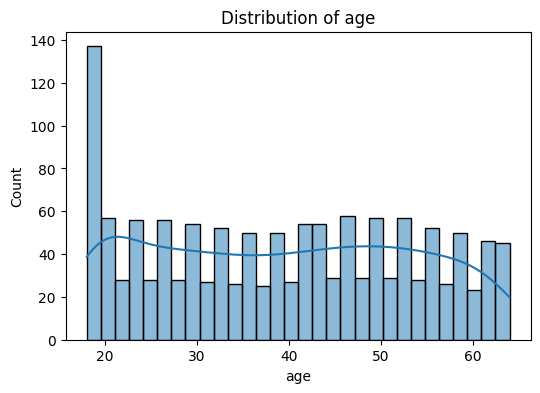

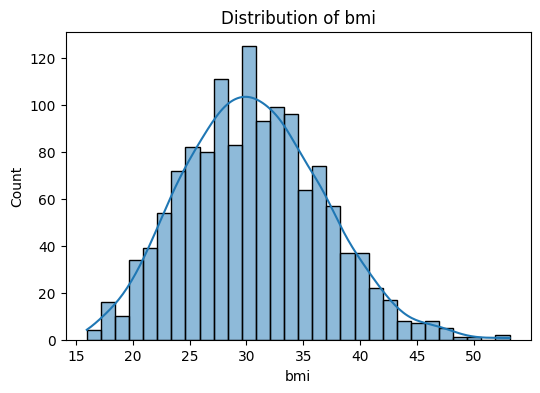

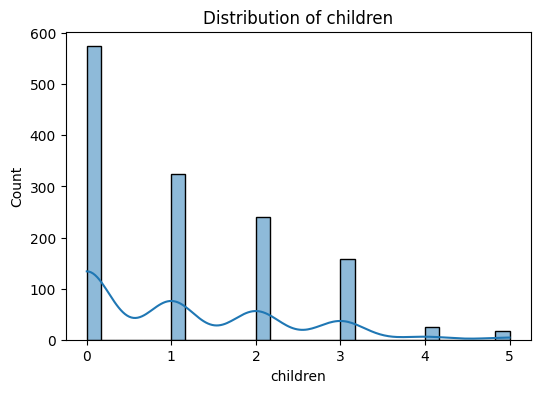

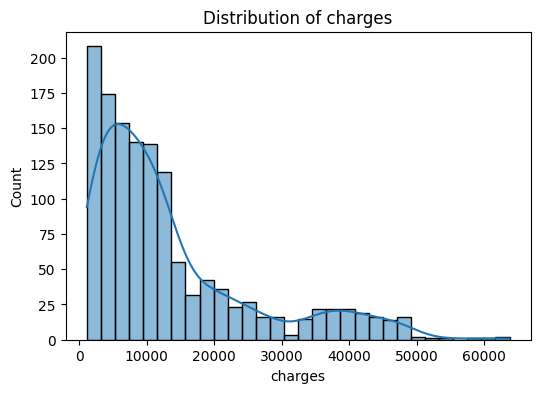

In [7]:
# Step 4: EDA - Numerical Features
numeric_features = ['age', 'bmi', 'children', 'charges']
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

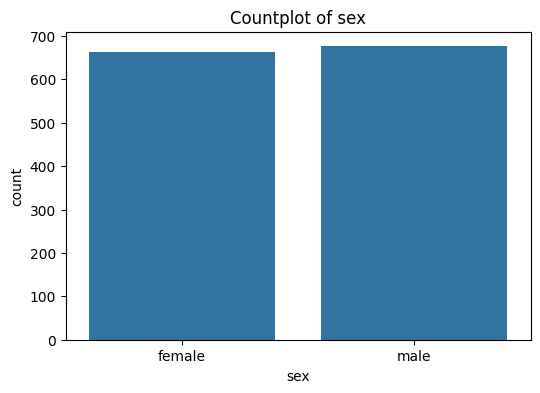

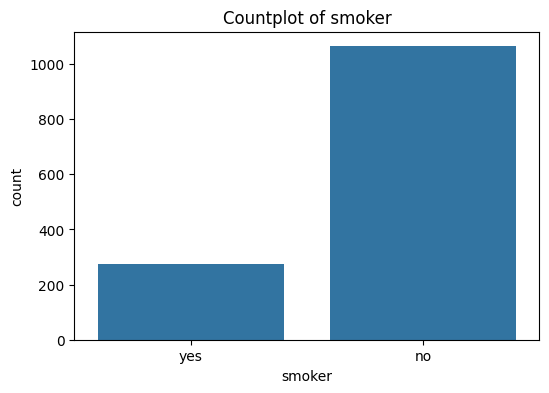

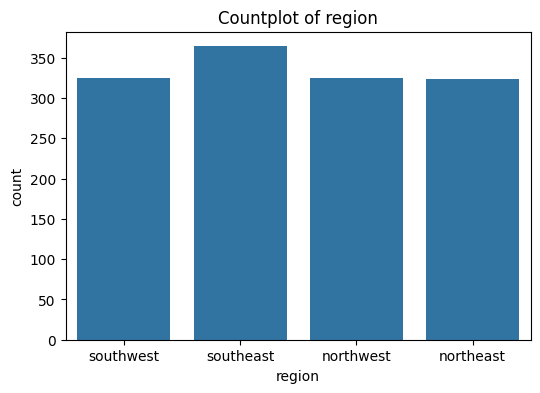

In [8]:
# Step 5: EDA - Categorical Features
categorical_features = ['sex', 'smoker', 'region']
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.show()

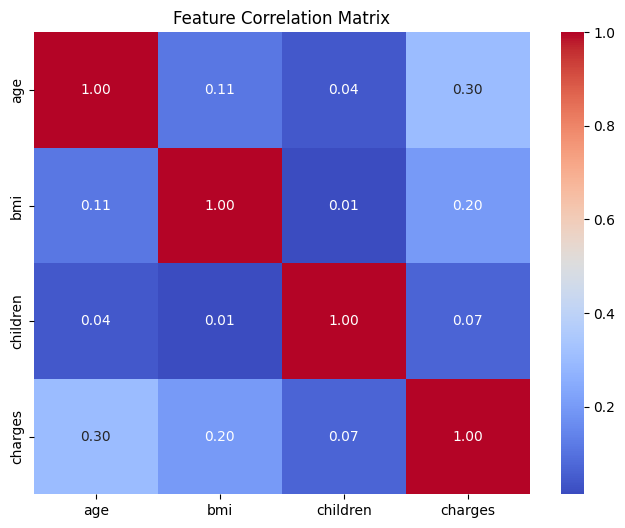

In [9]:
# Step 6: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

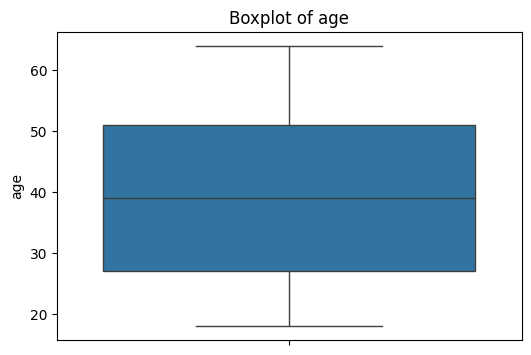

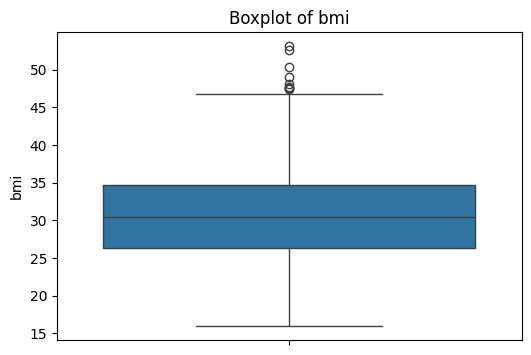

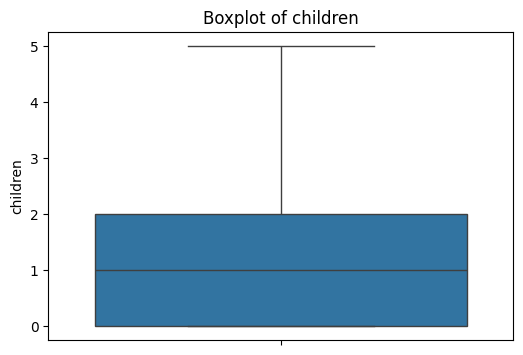

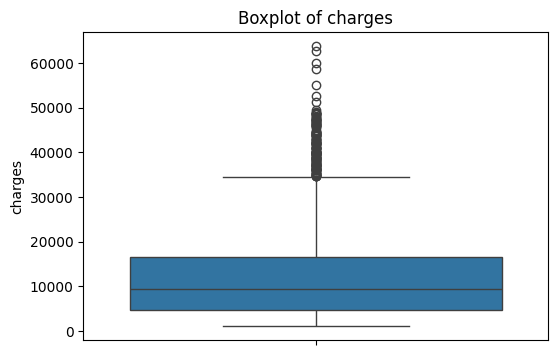

In [10]:
# Step 7: Boxplots for Outlier Detection
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

df[['sex','smoker','region']] = df[['sex','smoker','region']].apply(LabelEncoder().fit_transform)

In [12]:
# Step 9: Define Features and Target
X = df.drop('charges', axis=1)
y = df['charges']

In [13]:
# Step 10: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 11: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Step 12: Baseline Model - Predict Mean
y_pred_baseline = np.mean(y_train) * np.ones_like(y_test)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
print(f"Baseline RMSE: {rmse_baseline:.2f}, MAE: {mae_baseline:.2f}")

Baseline RMSE: 12465.61, MAE: 9593.34


In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
models = {
    "Linear Regression": y_pred_lr,
    "Ridge": y_pred_ridge,
    "Lasso": y_pred_lasso,
    "ElasticNet": y_pred_elastic,
    "Polynomial Regression": y_pred_poly,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gbr,
    "SVR": y_pred_svr,
    "KNN": y_pred_knn
}

results = []
for name, y_pred in models.items():
    # ensure predictions have right shape
    y_pred = np.ravel(y_pred)
    y_true = np.ravel(y_test)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    results.append([name, rmse, mae, r2])

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"])
results_df = results_df.sort_values(by="RMSE").reset_index(drop=True)
print(results_df)


NameError: name 'y_pred_lr' is not defined

In [18]:
# RMSE Comparison
plt.figure(figsize=(10,6))
sns.barplot(x="RMSE", y="Model", data=results_df.sort_values("RMSE"), palette="viridis")
plt.title("RMSE Comparison Across Models")
plt.show()

# R² Comparison
plt.figure(figsize=(10,6))
sns.barplot(x="R2", y="Model", data=results_df.sort_values("R2", ascending=False), palette="magma")
plt.title("R² Comparison Across Models")
plt.show()

NameError: name 'results_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

# Residuals Distribution
residuals = y_test - y_pred_ridge
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Ridge Regression Residuals Distribution")
plt.xlabel("Residuals")
plt.show()